In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score  
from sklearn.preprocessing import LabelEncoder

In [2]:
dt=pd.read_csv('Country-data.csv')
dt

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [34]:
dt.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [35]:
dt.duplicated().sum()

0

In [36]:
dt['country'].value_counts()

country
Afghanistan    1
Morocco        1
Myanmar        1
Namibia        1
Nepal          1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zambia         1
Name: count, Length: 167, dtype: int64

In [37]:
dt.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [3]:
x=dt[['child_mort','income','life_expec']] 
x

,child_mort,income,life_expec
0,90.2,1610,56.2
1,16.6,9930,76.3
2,27.3,12900,76.5
3,119.0,5900,60.1
4,10.3,19100,76.8
...,...,...,...
162,29.2,2950,63.0
163,17.1,16500,75.4
164,23.3,4490,73.1
165,56.3,4480,67.5


In [4]:
wcss=[] 
k_range=range(1,11) 

for k in k_range: 
    
    KM=KMeans(n_clusters=k,random_state=42)
    KM.fit(x)
    wcss.append(KM.inertia_)

C:\Users\RAJ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\RAJ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\RAJ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\RAJ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with M

In [5]:
wcss

[61693169544.67079,
 20897137773.4666,
 9961340237.87529,
 7752502278.240416,
 3720125707.754705,
 2797541856.4240746,
 1885367779.9219909,
 1122100750.906051,
 924558166.402888,
 763309350.4470943]

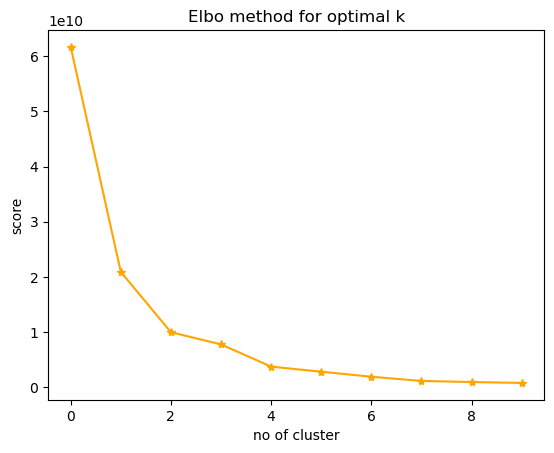

In [6]:
plt.plot(wcss,color='orange',marker='*') 
plt.xlabel("no of cluster")
plt.ylabel('score') 
plt.title('Elbo method for optimal k') 
plt.show()
# plt.plot(frange,sse,color="orange",marker='*')

In [9]:
features=dt[['child_mort','income','life_expec']] 

KM=KMeans(n_clusters=5,init='k-means++',random_state=42)
KM.fit(x)

C:\Users\RAJ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [30]:
dt['cluster']=KM.fit_predict(features) 
cluster_names={0:'l',1:'R',2:'A',3:'M',4:'A'} 
dt['cluster_Group']=dt['cluster'].map(cluster_names)

C:\Users\RAJ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [31]:
dt.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_Group
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,l
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,l
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,4,A
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,l
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,4,A


# Visualize The Cluster spend in 2D Plot

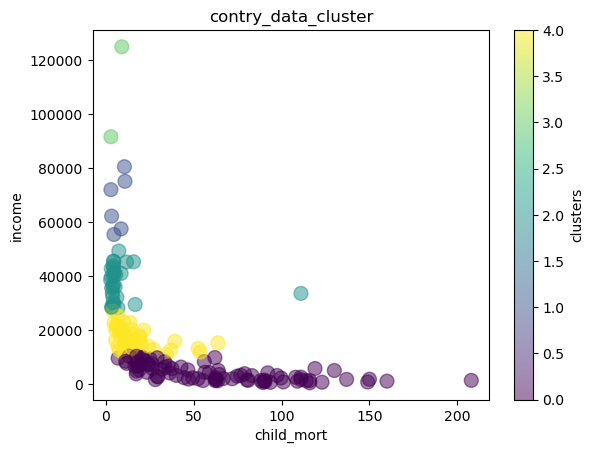

In [32]:
plt.scatter(dt['child_mort'],dt['income'],c=dt['cluster'],cmap='viridis',marker='o',s=100,alpha=0.5)
plt.xlabel('child_mort') 

plt.ylabel('income') 
plt.title('contry_data_cluster') 
plt.colorbar(label='clusters') 
plt.show()

In [33]:
print(silhouette_score(features,dt['cluster']))

0.6179274198935912


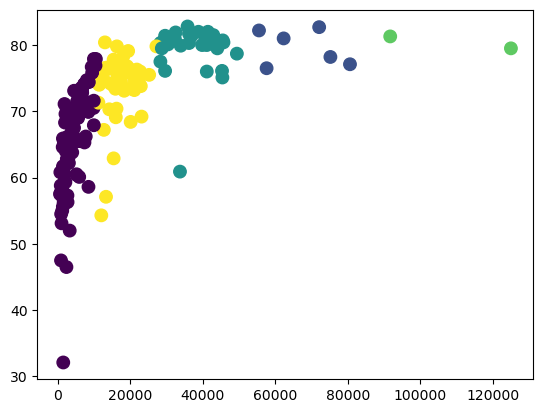

In [44]:
plt.scatter(dt['income'], dt['life_expec'], c=dt['cluster'], cmap='viridis', s=80)

In [41]:
data1 = dt[dt.cluster == 0]
data2 = dt[dt.cluster == 1]
data3 = dt[dt.cluster == 2] 
data4 = dt[dt.cluster == 3] 
data5 = dt[dt.cluster == 4]


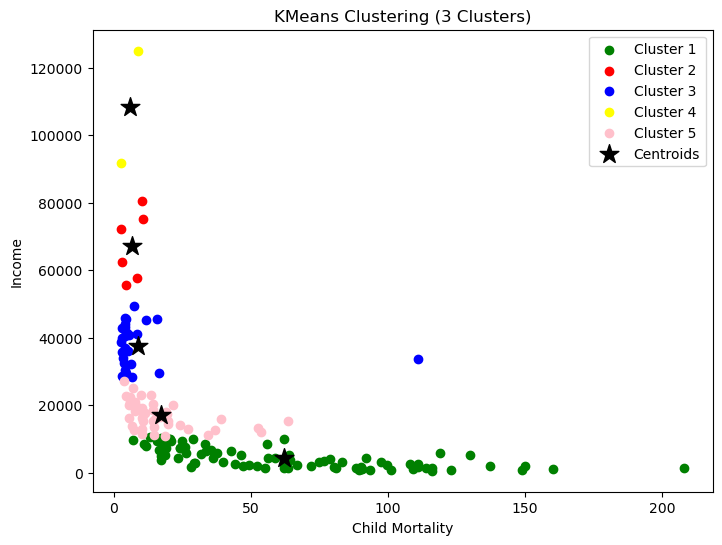

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(data1['child_mort'], data1['income'], color='green', label='Cluster 1')
plt.scatter(data2['child_mort'], data2['income'], color='red', label='Cluster 2')
plt.scatter(data3['child_mort'], data3['income'], color='blue', label='Cluster 3')
plt.scatter(data4['child_mort'], data4['income'], color='yellow', label='Cluster 4')
plt.scatter(data5['child_mort'], data5['income'], color='pink', label='Cluster 5')
# --- Step 6: Plot centroids ---
plt.scatter(KM.cluster_centers_[:, 0], KM.cluster_centers_[:, 1],
            color='black', marker='*', s=200, label='Centroids')

# --- Step 7: Labels & legend ---
plt.xlabel('Child Mortality')
plt.ylabel('Income')
plt.title('KMeans Clustering (3 Clusters)')
plt.legend()
plt.show()